In [1]:
#set up for regular fetching
import os
import tarfile
import urllib
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT+ 'datasets/housing/housing.tgz'

def fetch_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    print(tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [2]:
#we want to load the data in here

import pandas as pd

def load_data(path=HOUSING_PATH):
    csv_file_path = os.path.join(HOUSING_PATH, 'housing.csv')
    return pd.read_csv(csv_file_path)


In [3]:
fetch_data()
housing_data = load_data()

#housing_data.head()
housing_data.info()
housing_data.describe()

datasets/housing/housing.tgz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


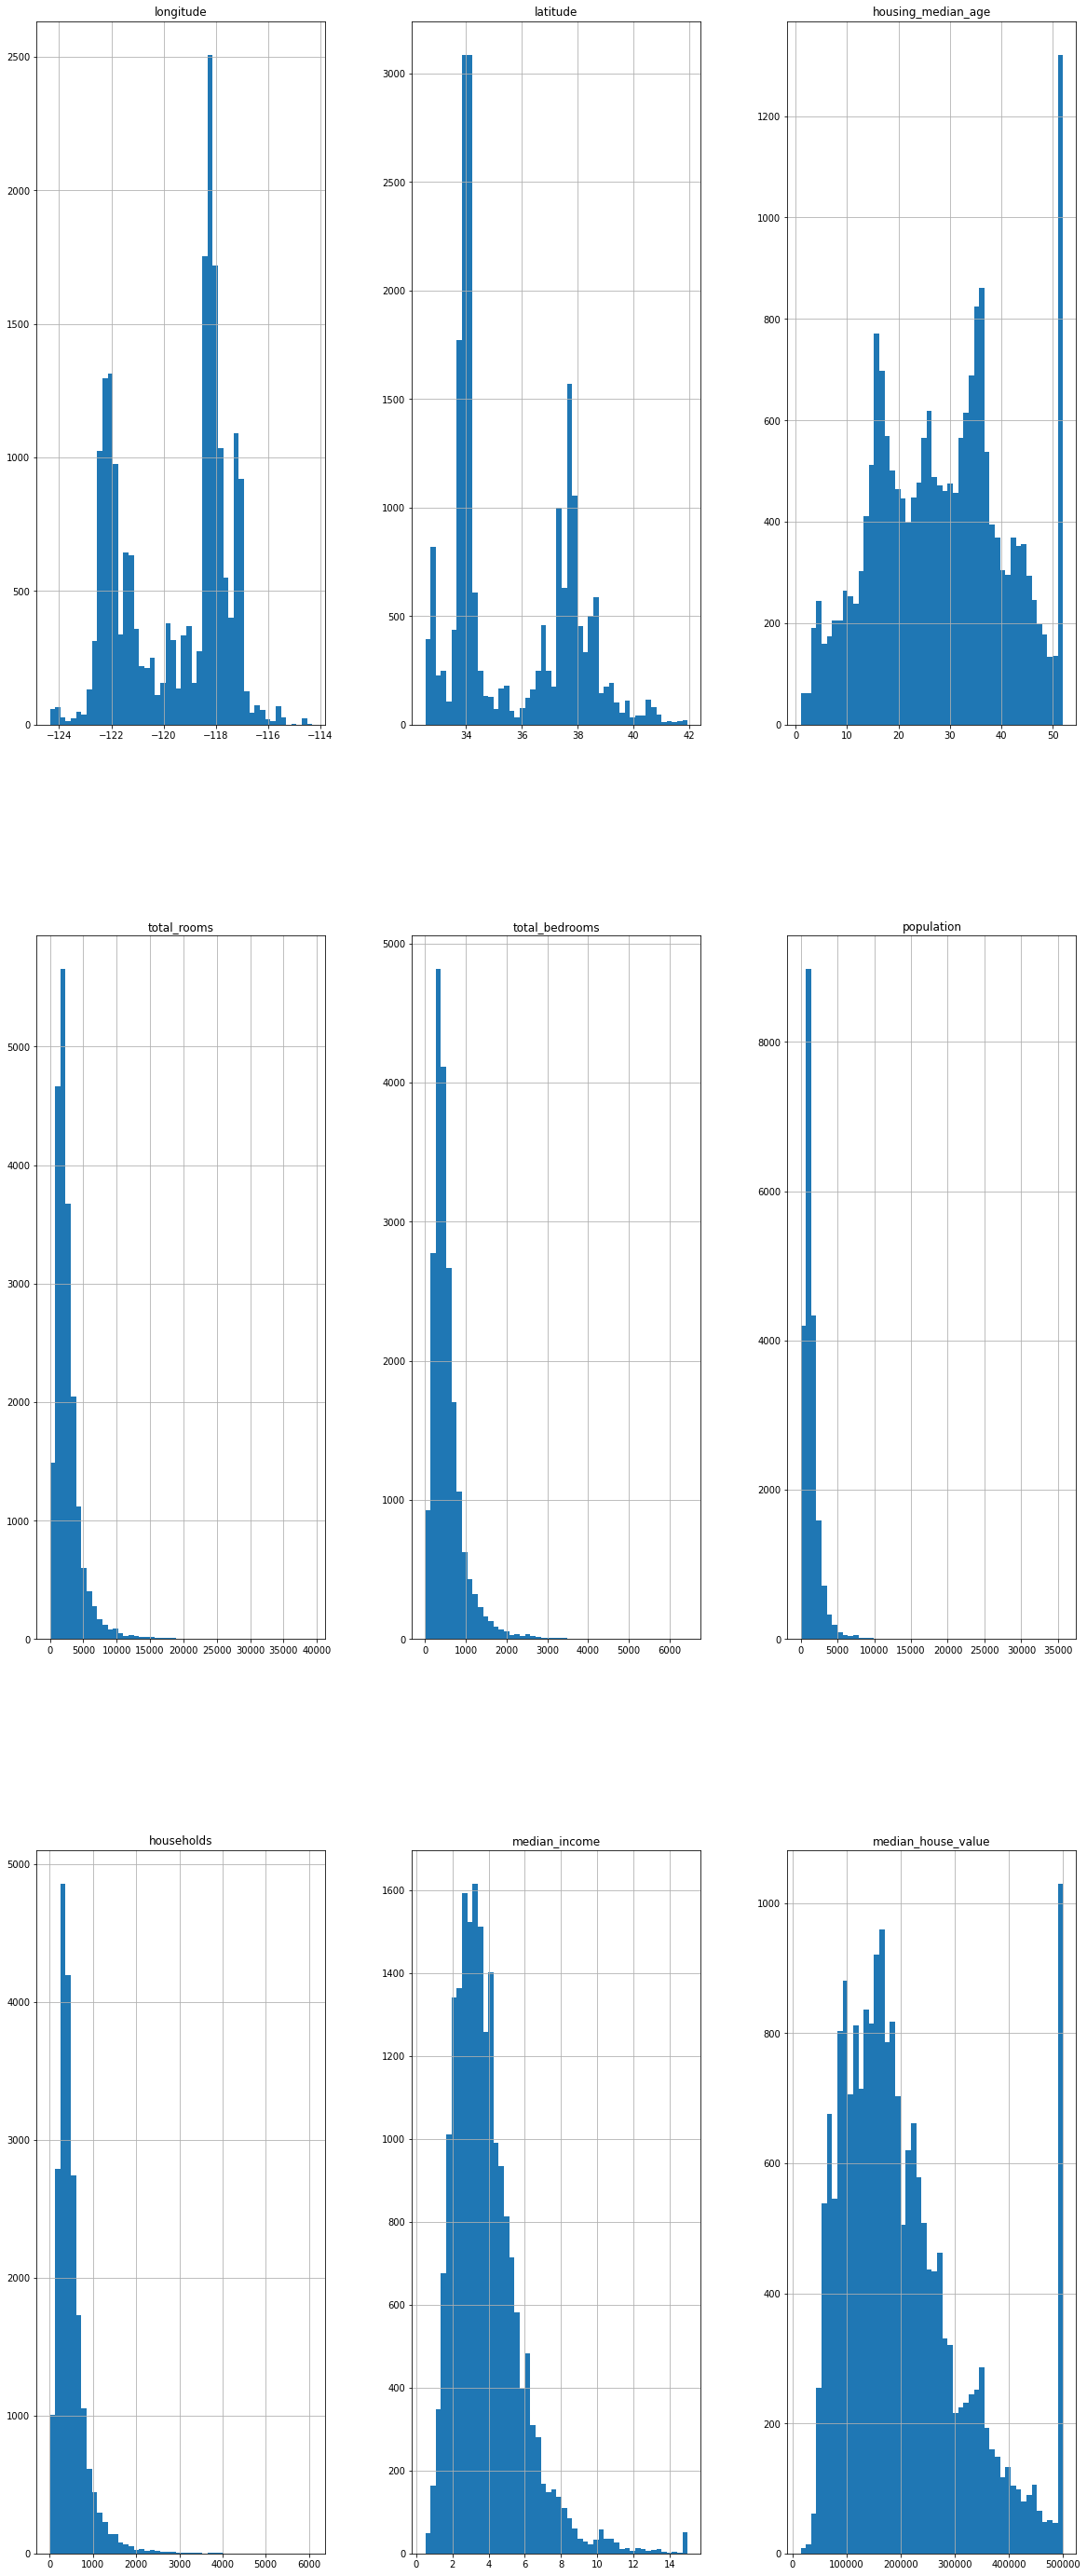

In [4]:
#plot a histogram
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20, 50))
plt.show()

In [5]:
#create a test set
import numpy as np
np.random.seed(42)
def split_training_set(data, test_ratio):
    '''
    test_ratio is the percentage of data that will
    go into the test set
    '''
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
print(f'{split_training_set(housing_data, 0.2)}')

train_set, test_set = split_training_set(housing_data, 0.2)


(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  medi

In [6]:
#to make sure that the test set is 
#consistent over many runs
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2**32

def split_train_set_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_data.reset_index()
housing_with_id.info()
train_set, test_set = split_train_set_by_id(housing_with_id, 0.2, 'index')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
 10  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


<AxesSubplot:>

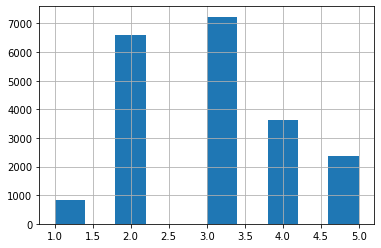

In [7]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'], 
                                   bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                   labels=[1, 2, 3, 4, 5])
housing_data['income_cat'].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    


strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

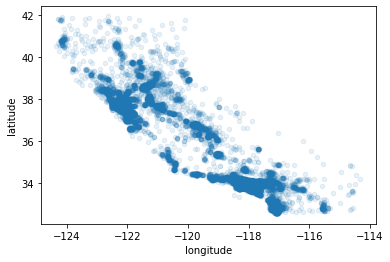

In [10]:
housing= strat_train_set.copy()
#explore the longitude and latitude
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

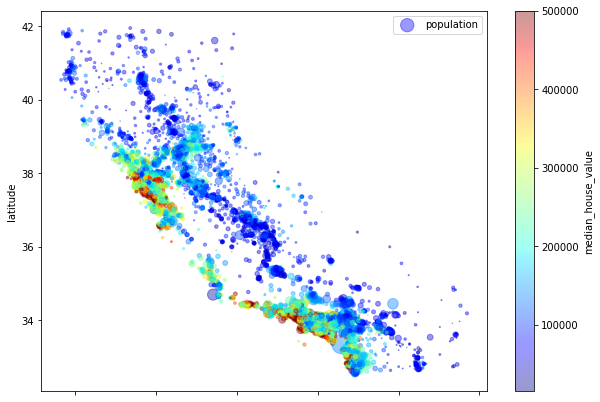

In [11]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
            )

In [12]:
#to compute the correlation:
corr_matrix = housing.corr()
#to check the ranking of other attributes to this one:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [13]:
#make new attrubutes
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [15]:
###########
#prepping data for maching learning model
###########
#1) Copy the data
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()





In [16]:


#2) clean the data
    #get rid of NaN
housing.dropna(subset=['total_bedrooms'])




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [25]:
#scikit imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
#this is to drop all labels
#all values are numerical
housing_num = housing.drop('ocean_proximity', axis=1)

#fit the imputer to fill na
imputer.fit(housing_num)
housing_num.describe()


#USE the imputer to transform 
#the fiellds with na to medians
x = imputer.transform(housing_num)

pd_x = pd.DataFrame(x)
pd_x.describe()

housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [34]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()
#dealing with textual data
from sklearn.preprocessing import OrdinalEncoder
ordinalEncode = OrdinalEncoder()
housing_cat_encoded = ordinalEncode.fit_transform(housing_cat)

#the model has found all the categories in categories_
ordinalEncode.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
#machine learning models can associate values
#so it is better to use one hot encoder
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
housing_hot_cat_encoded = hot_encoder.fit_transform(housing_cat)
print(f'values: {housing_hot_cat_encoded.toarray()}')
hot_encoder.categories_

values: [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]